#TP4: Les réseaux de neurones avec Keras 
## ---------------(Reconnaissance des chiffres)


> **Groupe-8**


* Tanekeu Bill Jordan-------------------------------19M2459

* Ndongo Ndongo Papia Ange Borel--------19M2308

* Ghomsi Sikali Diane Laure---------------------18U2202

* Tchuimo Wamba Jordan------------------------19M2396 


# Données utilisées: 
####Digit Recognizer:
####Learn computer vision fundamentals with the famous MNIST data

Lien de téléchargement: 

https://www.kaggle.com/competitions/digit-recognizer/data

In [ ]:
%pylab inline
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
#from scipy.misc.pilutil import imread
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras

Populating the interactive namespace from numpy and matplotlib


#Importation des données
Veuillez selectionner les fichiers (téléchargés plus haut)
 
*  train.csv
*sample_submission.csv
* test.csv

In [ ]:
from google.colab import files
import io
uploader = files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:

train = pd.read_csv(io.BytesIO(uploader["train.csv"]))
test = pd.read_csv(io.BytesIO(uploader["train.csv"]))
sample_submission = pd.read_csv(io.BytesIO(uploader["sample_submission.csv"]))


In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



* "train.iloc[:,1:]"   permet d'indexer les pixels (exclure les labels qui est la  colonne numéro 0)

* transformer le resulta en tableau numpy avec ".values" et attribuer un type de données avec astype() 

In [ ]:
train_x = (train.iloc[:,1:].values).astype('float32') # all pixel values
train_y = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
test_x = test.values.astype('float32')

In [ ]:
train_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
train_y

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [ ]:
import matplotlib.pyplot as plt

Convertir nos images en tableau numpy de 28*28

train_x.shape[0] représente le nombre d'image

In [ ]:
train_x = train_x.reshape(train_x.shape[0], 28, 28)


Afficharge de 3 images avec pour titre leurs labels

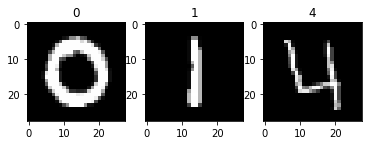

In [ ]:

for i in range(1, 4):
    plt.subplot(1,3,i)
    plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
    plt.title(train_y[i]);

Création de notre modèle de ML basé sur nos réseaux de neurones

In [ ]:
# Définition des variables
input_num_units = 784
hidden_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

# importation des modules de Keras
from keras.models import Sequential
from keras.layers import Dense

# Création du modèle
model = Sequential ([Dense(output_dim = hidden_num_units , input_dim = input_num_units , activation='relu'), 
                     Dense(output_dim = output_num_units , input_dim = hidden_num_units , activation = 'softmax') ])
# compiler de modèle avec les attributs nécessaires
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy']) 

pour la construction de notre modèle ici, nous définition un reseau de trois couches(entrée , une intermédiaire, et une de sorties).
la couche d'entrée comporte 784 neurones(qui sont en effet la taille de chaque image(28*28)). la couche intermédiaire quant à elle possède 50 neurones et celle de sortie 10 neurones correspondants chacun à un chiffre(0-9).
on définit ensuite un modèle séquentiel dont la première branche aura pour entrée notre image et pour sortie les neurones de la couche intermédiaire en utilisant la fonction "relu" pour activation; ce résultat est ensuite utilisé comme entrée de la deuxième branche dense qui a pour sortie nos 10 neurones de la couche sortie et pour activation la fonction 'softmax'
la fonction de perte ici est categorical_crossentropy et notre optimiseur est 'adam'

ENTRAÎNEMENT DU MODÈLE 

In [ ]:
trained_model = model.fit(train_x , train_y , nb_epoch = epochs , batch_size = batch_size , validation_data = (val_x , val_y))

pour entraîner notre modèle, on utililise notre jeu d'entrainement avec les étiquettes , on fixe nos itérations à 5 et les lots sont définis à 128
POUR la validation on utilise notre jeu de données val qui est constitué d'une part d'images et d'autres part des étiquettes correspondantes.

ÉVALUATION DU MODÈLE 

In [ ]:
pred = model.predict_classes(test_)